In [1]:
# Dependencies
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from config import pglogin

In [2]:
# Create engine
engine = create_engine(f'postgresql://{pglogin}@localhost:5432/sql-challenge')
connection = engine.connect()

In [3]:
# Read salary table
salary_df = pd.read_sql("SELECT * from salaries", connection)

In [4]:
# Check for missing/na values
salary_df.count()

emp_no    300024
salary    300024
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

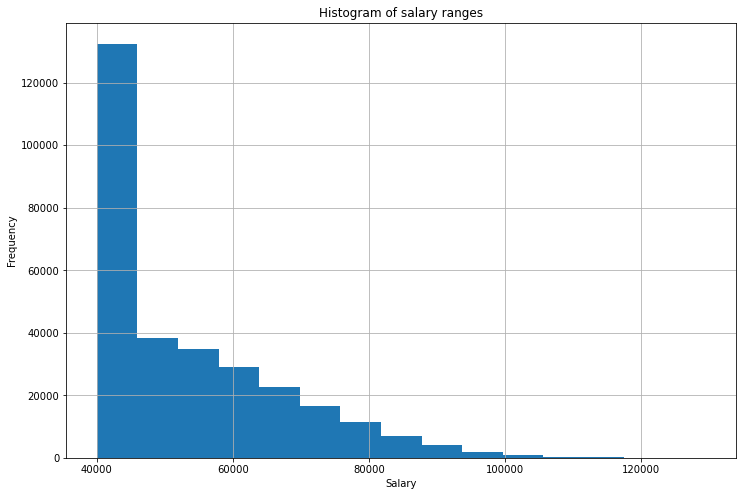

In [5]:
# Plot histogram
salary_df.hist(column="salary", bins=15, figsize=(12,8))
plt.title("Histogram of salary ranges")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show

In [6]:
# Read tables required for bar chart
# From employees, only employee number and title is required for this chart. Select only that to reduce data size
# Rename emp_title column to facilitate merge
employees_df = pd.read_sql("SELECT emp_no, emp_title AS title_id from employees", connection)
titles_df = pd.read_sql("SELECT * from titles", connection)

In [7]:
# Check for missing/na values
employees_df.count()

emp_no      300024
title_id    300024
dtype: int64

In [8]:
# Check for missing/na values
titles_df.count()

title_id    7
title       7
dtype: int64

All tables selected are full, no missing values. No need to replace NA with, e.g.
employees_df.fillna(value="emp_no":0,"title_id":"x9999")

In [9]:
# Merge titles
emp_titles = pd.merge(employees_df, titles_df, on="title_id")
emp_titles

,emp_no,title_id,title
0,473302,s0001,Staff
1,421786,s0001,Staff
2,273487,s0001,Staff
3,246449,s0001,Staff
4,48085,s0001,Staff
...,...,...,...
300019,111400,m0001,Manager
300020,111133,m0001,Manager
300021,110085,m0001,Manager
300022,110386,m0001,Manager


In [10]:
# Merge salaries
emp_salaries = pd.merge(emp_titles, salary_df, on="emp_no")
emp_salaries

,emp_no,title_id,title,salary
0,473302,s0001,Staff,40000.0
1,421786,s0001,Staff,40000.0
2,273487,s0001,Staff,56087.0
3,246449,s0001,Staff,87084.0
4,48085,s0001,Staff,63016.0
...,...,...,...,...
300019,111400,m0001,Manager,72446.0
300020,111133,m0001,Manager,71148.0
300021,110085,m0001,Manager,60026.0
300022,110386,m0001,Manager,40000.0


In [11]:
# Check data
emp_salaries.describe()

,emp_no,salary
count,300024.000000,300024.000000
mean,253321.763392,52970.732451
std,161828.235540,14301.478491
min,10001.000000,40000.000000
25%,85006.750000,40000.000000
50%,249987.500000,48681.000000
75%,424993.250000,61758.000000
max,499999.000000,129492.000000


In [12]:
# Calculate average salaries
average_salary = emp_salaries.groupby("title")["salary"].mean()
average_salary

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

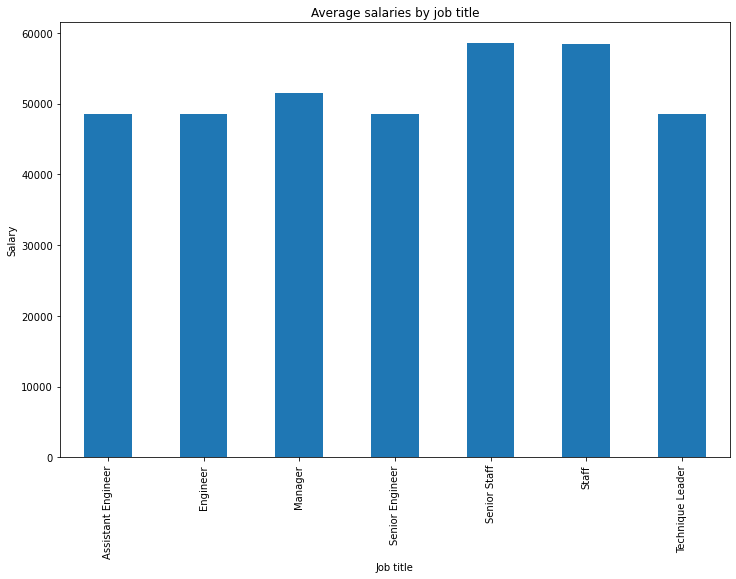

In [13]:
# Produce bar chart of average salaries
average_salary.plot(kind="bar", x="title", y="salary", figsize=(12,8))
plt.title("Average salaries by job title")
plt.xlabel("Job title")
plt.ylabel("Salary")
plt.show

In [14]:
# Check data for employee 499942
id499942_df = pd.read_sql("SELECT * from employees WHERE emp_no=499942", connection)
id499942_df

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
